In [ ]:
from matplotlib import pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import gradient_descent_v2
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
#Loads the CIFAR-10 dataset, and splits the data into train and test sets.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

A colored image contains 3 color channels, namely, red, green and blue (RGB). Their pixel values range from 0-255.

Every neuron’s input value gets multiplied with some weight value connected to this neuron. Consequently, multiplying weights with 255 would result in huge values which can cost high computational power. When dealing with even deeper neural networks (For instance YOLO or ResNet), the computational power would increase drastically.

So, each pixel value will be normalized to be in the [0, 1] range by dividing each pixel value by the maximum value which is 255. Because each pixel value is of type integer, and every number in the [0, 1] range is a decimal number, we will have to cast every pixel value from integer to float.

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = Sequential()

#After the first layer, there is no need to specify the size of the input anymore.
cnn.add(layer = Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), padding = "same", activation = "relu"))
cnn.add(layer = Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", activation = "relu"))
cnn.add(layer = MaxPooling2D(pool_size = (2, 2)))
cnn.add(layer = Dropout(rate = 0.2))

cnn.add(layer = Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same"))
cnn.add(layer = Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same"))
cnn.add(layer = MaxPooling2D(pool_size = (2, 2)))
cnn.add(layer = Dropout(rate = 0.2))

cnn.add(layer = Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu", padding = "same"))
cnn.add(layer = Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu", padding = "same"))
cnn.add(layer = MaxPooling2D(pool_size = (2, 2)))
cnn.add(layer = Dropout(rate = 0.2))

cnn.add(layer = Flatten())
cnn.add(layer = Dense(units = 128, activation = "relu"))
cnn.add(layer = Dropout(rate = 0.2))

#10 possible output classes.
cnn.add(layer = Dense(units = 10, activation = "softmax"))

In [ ]:
optimizer = gradient_descent_v2.SGD(learning_rate = 0.01, momentum = 0.9)

The cross entropy cost (or loss) function has been chosen, because we are predicting the likelihood of an example belonging to one of more than two classes, and the choice of the cost (or loss) function is directly related to the activation function we chose in the output layer of our neural network, which is the softmax activation function

The labels expected to be provided to the neural network as integers and not OneHot, and hence the sparse_categorical_crossentropy has been selected.

In [ ]:
cnn.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#Parameters are weights that are learnt during training.
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
#Early stopping regularizer will terminate the training procedure once there is one consecutive epoch without at least 0.01 
#of improvement on the test data.
early_stopping_loss = EarlyStopping(monitor = "val_loss", min_delta = 0.01, patience = 1, verbose = 1, mode = "min")

In [ ]:
training = cnn.fit(x = X_train, y = y_train, batch_size = 64, epochs = 25, callbacks = [early_stopping_loss], 
                   validation_data = (X_test, y_test), steps_per_epoch = int(50_000 / 64))

Epoch 1/25
781/781 [==============================] - 375s 479ms/step - loss: 1.9161 - accuracy: 0.2933 - val_loss: 1.5687 - val_accuracy: 0.4325
Epoch 2/25
781/781 [==============================] - 365s 468ms/step - loss: 1.4868 - accuracy: 0.4593 - val_loss: 1.3615 - val_accuracy: 0.5096
Epoch 3/25
781/781 [==============================] - 383s 490ms/step - loss: 1.2691 - accuracy: 0.5417 - val_loss: 1.1071 - val_accuracy: 0.5967
Epoch 4/25
781/781 [==============================] - 377s 483ms/step - loss: 1.1166 - accuracy: 0.6017 - val_loss: 0.9835 - val_accuracy: 0.6472
Epoch 5/25
781/781 [==============================] - 383s 490ms/step - loss: 1.0045 - accuracy: 0.6455 - val_loss: 0.8879 - val_accuracy: 0.6817
Epoch 6/25
781/781 [==============================] - 406s 520ms/step - loss: 0.8981 - accuracy: 0.6820 - val_loss: 0.8702 - val_accuracy: 0.6994
Epoch 7/25
781/781 [==============================] - 404s 517ms/step - loss: 0.8258 - accuracy: 0.7099 - val_loss: 0.7580 -

In [ ]:
loss, accuracy = cnn.evaluate(x = X_test, y = y_test)
print(accuracy * 100)

313/313 [==============================] - 19s 60ms/step - loss: 0.6955 - accuracy: 0.7615
76.15000009536743


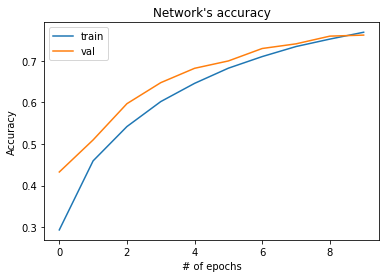

In [ ]:
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("Network's accuracy")
plt.ylabel("Accuracy")
plt.xlabel("# of epochs")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

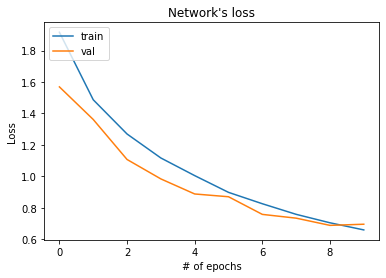

In [ ]:
plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("Network's loss")
plt.ylabel("Loss")
plt.xlabel("# of epochs")
plt.legend(["train", "val"], loc = "upper left")
plt.show()

In [ ]:
cnn.save(filepath = "final_model.h5")